In [10]:
import os
import pandas as pd
import pylab as pl
%pylab inline


    


Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [3]:
print(puidata)

/Users/anaemendezmendez/Documents/NYU_PHD/Fall_2018/PUI2018/PUIDATA


In [38]:
!curl https://data.cityofnewyork.us/api/views/fcau-jc6k/rows.csv?accessType=DOWNLOAD > infant_mortality.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2501    0  2501    0     0   2501      0 --:--:-- --:--:-- --:--:-- 10780


In [39]:
!mv infant_mortality.csv $PUIDATA

In [40]:
!ls $PUIDATA

income.csv           infant_mortality.csv nycdeaths.csv


In [41]:
mortality = pd.read_csv("%s/infant_mortality.csv"%os.getenv("PUIDATA"))

In [142]:
mortality.head(7)

,Year,Materal Race or Ethnicity,Infant Mortality Rate,Neonatal Mortality Rate,Postneonatal Mortality Rate,Infant Deaths,Neonatal Infant Deaths,Postneonatal Infant Deaths,Number of Live Births
0,2007,Black Non-Hispanic,9.8,6.0,3.8,287.0,177.0,110.0,29268
1,2013,Other Hispanic,4.3,2.6,1.7,120.0,72.0,48.0,27621
2,2013,Black Non-Hispanic,8.3,5.5,2.9,201.0,132.0,69.0,24108
3,2008,White Non-Hispanic,3.3,2.1,1.1,125.0,82.0,43.0,38383
4,2009,Black Non-Hispanic,9.5,5.8,3.7,259.0,158.0,101.0,27405
5,2010,Black Non-Hispanic,8.6,5.6,3.1,230.0,148.0,82.0,26635
6,2010,White Non-Hispanic,2.8,2.0,0.8,104.0,75.0,29.0,37780


In [63]:
mortality_sorted = mortality.sort_values(by=['Year', 'Materal Race or Ethnicity'])

In [64]:
mortality_removed = mortality_sorted.drop(labels=['Neonatal Mortality Rate','Postneonatal Mortality Rate', 'Neonatal Infant Deaths','Infant Deaths','Postneonatal Infant Deaths','Number of Live Births'], axis=1)

## Because in order for this data to make sense we need both the 'Year' and 'Maternal Race or Ethnicity' columns, I will keep both and make a plot for each race.

In [66]:
mortality_removed.head()

,Year,Materal Race or Ethnicity,Infant Mortality Rate
25,2007,Asian and Pacific Islander,3.1
0,2007,Black Non-Hispanic,9.8
35,2007,Other Hispanic,4.3
9,2007,Other/Two or More,NaN
24,2007,Puerto Rican,6.3


In [80]:
maternal_races = mortality_removed['Materal Race or Ethnicity'].unique().tolist()

In [84]:
maternal_races

['Asian and Pacific Islander',
 'Black Non-Hispanic',
 'Other Hispanic',
 'Other/Two or More',
 'Puerto Rican',
 'White Non-Hispanic']

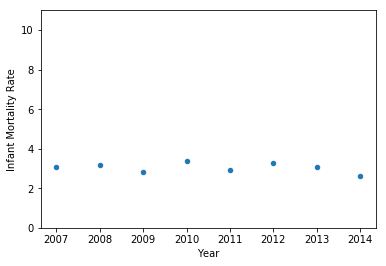

Figure 1. Infant mortality rate in NYC against time in between 2007 and 2014 for race: Asian and Pacific Islander


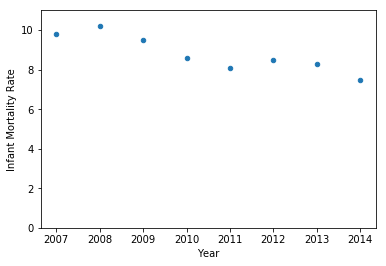

Figure 2. Infant mortality rate in NYC against time in between 2007 and 2014 for race: Black Non-Hispanic


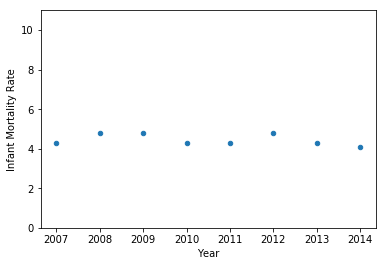

Figure 3. Infant mortality rate in NYC against time in between 2007 and 2014 for race: Other Hispanic


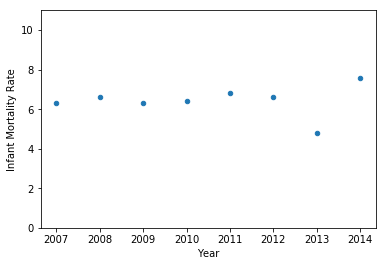

Figure 4. Infant mortality rate in NYC against time in between 2007 and 2014 for race: Puerto Rican


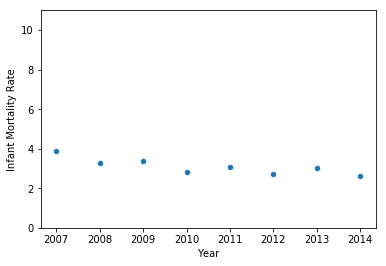

Figure 5. Infant mortality rate in NYC against time in between 2007 and 2014 for race: White Non-Hispanic

 Though infant mortality rate was higher for Puerto Ricans in 2014, the trend has been for infant mortality to
 decrease a little or remain more or less the same. There is no data for the race Other/Two or More, which is
 why there is not plot for that race.


In [150]:
count = 1
for race in maternal_races:
    a = mortality_removed[mortality_removed['Materal Race or Ethnicity']==race]
    if ~a['Infant Mortality Rate'].isnull().all():
        a.plot(x="Year", y="Infant Mortality Rate", kind='scatter')
        pl.xlabel('Year')
        pl.ylabel('Infant Mortality Rate')
        pl.ylim(0,11)
        pl.show()
        print('Figure '+str(count)+'. Infant mortality rate in NYC against time in between 2007 and 2014 for race: ' + race)
        count = count+1
print('\n Though infant mortality rate was higher for Puerto Ricans in 2014, the trend has been for infant mortality to\n decrease a little or remain more or less the same. There is no data for the race Other/Two or More, which is\n why there is not plot for that race.')
